In [34]:
#very simple example
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

#load features as X and labels as y
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(max_iter=300,random_state=0).fit(X, y)

#predict on a few examples
print(clf.predict(X[:2, :]))

#we can also get the probabilities of each class the prediction was based off of
print(clf.predict_proba(X[:2, :]))

# Finally, score gives us the accuracy by default.
print(clf.score(X, y))



[0 0]
[[9.81586051e-01 1.84139349e-02 1.44831264e-08]
 [9.71342034e-01 2.86579362e-02 3.01591102e-08]]
0.9733333333333334


In [35]:
# implement a logistic regression model to separate setosa from the other types of iris: virginica, versicolor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#Get and explore data
iris=sns.load_dataset('iris')
print(iris)
print(iris.columns) #What are iris' columns?
print(iris.describe()) # Descriptive statistics of numeric columns 
print(iris.info()) # What types are the columns and how many null values are there?
print(iris['species'].unique()) #What are the unique values of the species column?
print(iris['species'].value_counts())



     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
       sepal_length  sepal_width  peta

In [37]:
print(iris.loc[iris['species'] == 'versicolor'].index[0]) # what is the index of first value that matches versicolor
print((iris.species.values != 'setosa').argmax())
print(iris.species.ne('setosa').idxmax())
#df.A.ne('a').idxmax()

50
50
50


In [38]:
#Let's make this into a binary problem: The label will be zero if the species is setosa, otherwise it will be one.
sp_list=[0]*150
for i in range(0,150):
    if i>=50:
        sp_list[i]=1
iris['label']=sp_list
print(iris['label'].unique())
print(iris['label'].value_counts())
iris.drop('species',axis=1,inplace=True)

[0 1]
1    100
0     50
Name: label, dtype: int64


In [39]:
#Explore our transformed data:
print(iris)
print(iris.info())
print(iris.describe())


     sepal_length  sepal_width  petal_length  petal_width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      1
146           6.3          2.5           5.0          1.9      1
147           6.5          3.0           5.2          2.0      1
148           6.2          3.4           5.4          2.3      1
149           5.9          3.0           5.1          1.8      1

[150 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   s

In [40]:
#break our data down into a feature set (X) and a label (y)
X=iris.drop('label',axis=1)
y=iris['label']
y.shape

(150,)

In [41]:
#Split our transformed data
#random_state makes it repeatable 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3333, random_state=99)

In [42]:
#Create a logistic regression model
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
y_train.shape

(100,)

In [43]:
predictions=logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        35

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[15  0]
 [ 0 35]]


In [44]:
# implement a logistic regression model to separate setosa from the other types of iris: virginica, versicolor

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#get your data
iris=sns.load_dataset('iris')

print(iris)


# prepare your data: 

#setosa is the first 50 samples. Make those 0 and make the others 1 
sp_list=[0]*150
for i in range(0,150):
    if i>=50:
        sp_list[i]=1
iris['label']=sp_list

# we have numerically encoded our target, so we can now drop the species column.
iris.drop('species',axis=1,inplace=True)
print(iris)
print(iris.info())
print(iris.describe())

X=iris.drop('label',axis=1)
y=iris['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3333, random_state=99)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))




     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
     sepal_length  sepal_width  petal_length  petal_width  label
0             5.1          3.5           1.4          0.2      0
1             4.9 

In [69]:
#learning curves allow you to visualize how your model is performing over time as you add more training steps to it
#Let's look at how we can implement one
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
        logmodel, #we feed the learning curve our estimator
        X=X,y=y,  #we feed it our dataset
        train_sizes=[10,40,60,80], #set the train sizes that we are going to iterate through
        shuffle=True, # shuffle randomized the inputs
        scoring='accuracy') #specify the score we will show on the y axis. Accuracy is the default for a class problem.


In [70]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores) #default cross validation is 5, so each train size gives us 5 results

Training scores:

 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.96666667 1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]]


In [71]:
import pandas as pd
#Let's take the mean of these
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 10    1.0
40    1.0
60    1.0
80    1.0
dtype: float64

 --------------------

Mean validation scores

 10    0.993333
40    1.000000
60    1.000000
80    1.000000
dtype: float64


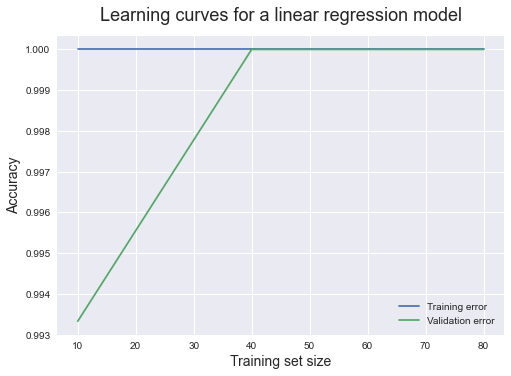

In [72]:
import matplotlib.pyplot as plt
#Here is a plt plot of it.
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0.95,1)

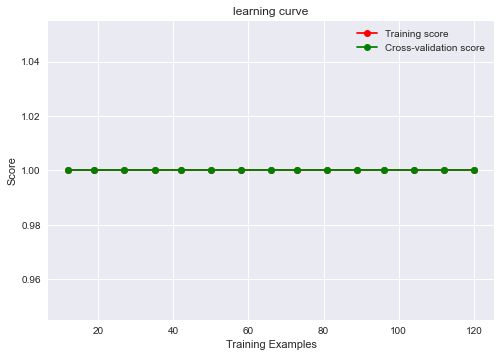

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3, random_state=101)
#train_scores_mean = np.mean(X_train, axis=1)
#test_scores_mean = np.mean(X_test, axis=1)
plt.figure()
plt.title("learning curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(logmodel, X, y,train_sizes=np.linspace(0.1,1.0,15),shuffle=True)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)  

plt.grid
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")

plt.legend(loc="best")

In [63]:
#np.linspace(0,1,5)

In [74]:
#Let's look at how to solve this same problems with Tensorflow
import tensorflow as tf

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))


TensorFlow version: 2.4.1
Eager execution: True


In [76]:
# build your model
#Sequential takes a list of model layers as input.  
# For binary classification, we use an activation of sigmoid for the output layer
#The input layer requires us to define an input shape - in this case the four features we created earlier
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,), name='input_layer'),  # input shape required
  #tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [77]:
#We can view the architecture of our model with a summary call:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [78]:
#:Let's look at and play around with the first layer
print(model.layers) #we can access the layers of a model
input_layer=model.layers[0] #we can assign them
print(input_layer.name)  #we can view their individual characteristics
print(input_layer.get_config()) # we can view all of their settings
weights = input_layer.get_weights()
print(weights) # we can see how the initial paramaters are initialized

[<tensorflow.python.keras.layers.core.Dense object at 0x1aee38d60>, <tensorflow.python.keras.layers.core.Dense object at 0x1aed3fb50>]
input_layer
{'name': 'input_layer', 'trainable': True, 'batch_input_shape': (None, 4), 'dtype': 'float32', 'units': 10, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[-0.41335106, -0.6255724 , -0.00760162, -0.37071595, -0.2758224 ,
         0.04112875,  0.28878576, -0.650624  ,  0.26333773,  0.07726085],
       [-0.06186515,  0.560089  ,  0.32220203,  0.3888768 , -0.09968138,
        -0.42921442,  0.08165473,  0.581519  ,  0.12277704, -0.6200432 ],
       [ 0.20674944,  0.05640131,  0.57738626,  0.21640009, -0.15359181,
        -0.0251354 ,  0.27068204,  0.41102993, -0.49271542, -

In [79]:
# next step is to compile our model
#optimizer specifies how we will find the minimum of the loss
#loss specifies the function the optimizer minimizes
#metrics specifies the evaluation metric we want to evaluate every epoch
#Epoch = one pass through data set
model.compile(optimizer='sgd',loss="binary_crossentropy", metrics=["accuracy"])


In [80]:
# Next we run a fit.  We can persist our model training history by assigning our fit to a variable
history = model.fit(X_train, y_train,epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 708us/step - loss: 0.4388 - accuracy: 0.9327
Epoch 2/200
4/4 [==============================] - 0s 559us/step - loss: 0.3868 - accuracy: 0.9702
Epoch 3/200
4/4 [==============================] - 0s 591us/step - loss: 0.3609 - accuracy: 0.9809
Epoch 4/200
4/4 [==============================] - 0s 964us/step - loss: 0.3208 - accuracy: 0.9910
Epoch 5/200
4/4 [==============================] - 0s 837us/step - loss: 0.3091 - accuracy: 0.9941
Epoch 6/200
4/4 [==============================] - 0s 927us/step - loss: 0.3101 - accuracy: 0.9847
Epoch 7/200
4/4 [==============================] - 0s 820us/step - loss: 0.2821 - accuracy: 1.0000
Epoch 8/200
4/4 [==============================] - 0s 713us/step - loss: 0.2834 - accuracy: 1.0000
Epoch 9/200
4/4 [==============================] - 0s 744us/step - loss: 0.2814 - accuracy: 1.0000
Epoch 10/200
4/4 [==============================] - 0s 867us/step - loss: 0.2551 - accuracy: 1.0000
Epoch 11/

In [81]:
# .predict gives us the logodds from the model
#predict_classes interpolates to our 0 or 1 class
print(X_test[:5])
print(model.predict(X_test[:2]))
print((model.predict_classes(X_test[:5])))

     sepal_length  sepal_width  petal_length  petal_width
33            5.5          4.2           1.4          0.2
16            5.4          3.9           1.3          0.4
43            5.0          3.5           1.6          0.6
129           7.2          3.0           5.8          1.6
50            7.0          3.2           4.7          1.4
[[0.00798562]
 [0.0113419 ]]
[[0]
 [0]
 [0]
 [1]
 [1]]


/Users/rjdaskevich/opt/anaconda3/envs/rjstf/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [82]:
#predict classes is going away and this is how you convert logodds to classes:
print((model.predict(X_test[:5]) > 0.5).astype("int32"))


[[0]
 [0]
 [0]
 [1]
 [1]]


In [83]:
#we can do a learning curve by implementing a histogram of our history object
history.history

{'loss': [0.4285949766635895,
  0.38580554723739624,
  0.35466986894607544,
  0.3339473307132721,
  0.3152334988117218,
  0.30160969495773315,
  0.2902584373950958,
  0.28099820017814636,
  0.273291677236557,
  0.2643137276172638,
  0.2543630599975586,
  0.24774815142154694,
  0.23914958536624908,
  0.23219174146652222,
  0.22583314776420593,
  0.21991582214832306,
  0.2126488983631134,
  0.20623837411403656,
  0.2005741149187088,
  0.19512687623500824,
  0.1901976466178894,
  0.1845170110464096,
  0.17965508997440338,
  0.17531563341617584,
  0.17186012864112854,
  0.16653324663639069,
  0.16157230734825134,
  0.15748389065265656,
  0.1535077840089798,
  0.14971846342086792,
  0.14591434597969055,
  0.14343351125717163,
  0.13944508135318756,
  0.13654698431491852,
  0.13284623622894287,
  0.1301996111869812,
  0.12699133157730103,
  0.12415200471878052,
  0.12150363624095917,
  0.11874362081289291,
  0.1160559132695198,
  0.11375834047794342,
  0.11131836473941803,
  0.10898120701313

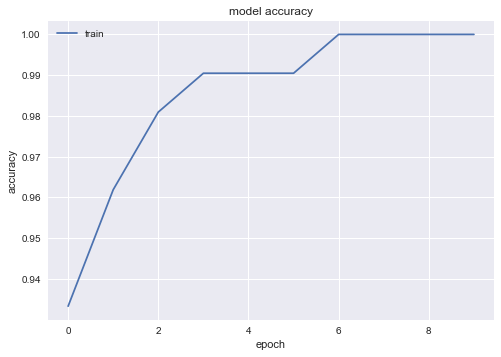

In [85]:
# Let's look at the interesting part of our graph
plt.plot(history.history['accuracy'][:10])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#We could've done this within 15 epochs!

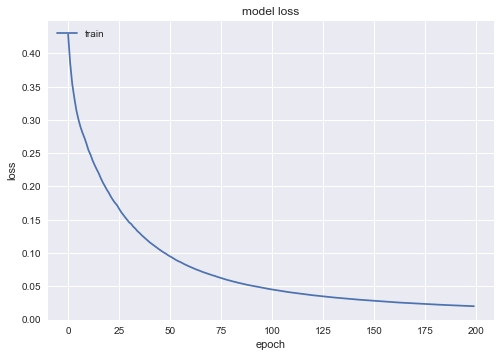

In [86]:
#Let's view the history of our loss optimization
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
print(y_test[:5])

33     0
16     0
43     0
129    1
50     1
Name: label, dtype: int64


In [88]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [89]:
#Let's create a dataframe to compare our predicted classes against our true labels
newdf=pd.DataFrame()
newdf['y_test']=y_test[:5]
newdf['y_pred']=(model.predict(X_test[:5]) > 0.5).astype("int32")
newdf

,y_test,y_pred
33,0,0
16,0,0
43,0,0
129,1,1
50,1,1


In [90]:
# We also have an evaluate method:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

2/2 - 0s - loss: 0.0206 - accuracy: 1.0000


In [91]:
model.predict(X_test[:5])

array([[0.00798562],
       [0.0113419 ],
       [0.05629793],
       [0.9985539 ],
       [0.97720253]], dtype=float32)